# PHYS 432 HW 3, swimming in syrup

Ruijia Yang, 2022-03-10

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Import sympy to solve the equation.

In [11]:
from sympy.solvers import solve
from sympy import Symbol

In [ ]:
x = Symbol('x', real=True)

In [178]:
def total_drag(coeff, speed):
    #return 189*coeff*speed**2 + 628*speed**3 + 0.13*(speed**3)*(170-(10**5)*(coeff/speed)) +\
    #        126*np.sqrt(coeff)*(speed**(3/2))*((10**5)*(coeff/speed)-10)**(1/2)
    return (94+(10**5)*63)*coeff*speed**2 + 157*speed**3 + 0.13*(speed**3)*(160-(10**5)*(coeff/speed))

In [184]:
total_drag(0.01, 100)#-(8.065E8)

9400.0

In [185]:
solve(total_drag(0.01, x)-(8.065E8), x)

[]

Generate evenly spaced $\nu$ on a log scale; then solve equation for each $\nu$ value.

In [171]:
nu_range = np.logspace(-2,2,100)

In [186]:
speed_range = [solve(650*x**3-12812*ind_nu*x**2-(6.4E8), x) for ind_nu in nu_range]
#speed_range = [solve(total_drag(ind_nu, x)-(6.4E8), x) for ind_nu in nu_range]

Plotting velocity vs $\nu$, and add different kinematic viscosity values

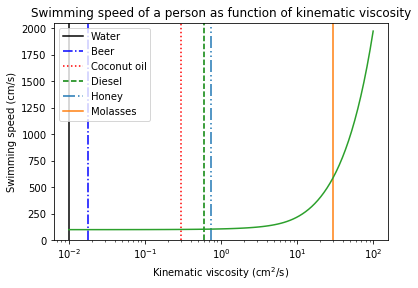

In [190]:
plt.plot([0.01,0.01],[0,2200],'k-') # Water
plt.plot([0.018,0.018],[0,2200],'b-.') # Beer
plt.plot([0.3,0.3],[0,2200],'r:')     # Coconut oil
plt.plot([0.6,0.6],[0,2200],'g--')     # Diesel
plt.plot([0.73,0.73],[0,2200],linestyle=(0, (8, 2, 1, 2, 1, 2)))   # Honey
plt.plot([30,30],[0,2200])       # Molasses

plt.plot(nu_range,speed_range)

plt.xscale('log')
plt.xlabel('Kinematic viscosity (cm$^2$/s)')
plt.ylabel('Swimming speed (cm/s)')
plt.ylim([0,2050])
plt.title('Swimming speed of a person as function of kinematic viscosity')
plt.legend(['Water', 'Beer','Coconut oil','Diesel','Honey','Molasses'])
plt.savefig('molasses.pdf',format='pdf')
plt.show()

Now let's look up some kinematic viscosities. 

Water: $\nu_{\textrm{water}} = 0.01\textrm{ cm}^2\textrm{/s}$

Rest looking up from reference; all unit given in cm$^2$/s

- Beer: 0.018

- Coconut oil: $\thicksim0.3$

- Diesel 5D: $\thicksim0.60$ (take an average between 86.6 and 35.2)

- Molasses C, blackstrap: $\thicksim30$ (take an order of magnitude)

- Honey: 0.73

__Reference__

Engineering ToolBox, (2003). Liquids - Kinematic Viscosities [online]. Available at: https://www.engineeringtoolbox.com/kinematic-viscosity-d_397.html (Accessed 2022-03-10).

Do the results make sense?

To be honest, I don't think it fits my intuition. The velocity gets faster as the viscosity increases, which is a little strange for an object so crudely modelled as a bullet. Intuitionally, the drag would increase as the viscosity increases, however it becomes easier for a swimmer to exert forces on the liquid, but that is not being modelled in my case.